# Imports

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.core import datetools

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARMA

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import and Clean Data

Import

In [3]:
df = pd.read_csv("../datasets/daily.csv", index_col=0)
print(df.shape)
df.head()

(4506, 5)


,1. open,2. high,3. low,4. close,5. volume
2000-01-03,1469.25,1478.00,1438.3600,1455.22,931800000
2000-01-04,1455.22,1455.22,1397.4301,1399.42,1009000000
2000-01-05,1399.42,1413.27,1377.6801,1402.11,1085500000
2000-01-06,1402.11,1411.90,1392.1000,1403.45,1092300000
2000-01-07,1403.45,1441.47,1400.7300,1441.47,1225200000


Clean as described in Conclusion of EDA

In [4]:
df.index = pd.to_datetime(df.index)
df.columns = [x.split()[1] for x in df.columns]
print(type(df.index))
df.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,open,high,low,close,volume
2000-01-03,1469.25,1478.00,1438.3600,1455.22,931800000
2000-01-04,1455.22,1455.22,1397.4301,1399.42,1009000000
2000-01-05,1399.42,1413.27,1377.6801,1402.11,1085500000
2000-01-06,1402.11,1411.90,1392.1000,1403.45,1092300000
2000-01-07,1403.45,1441.47,1400.7300,1441.47,1225200000


Visualize

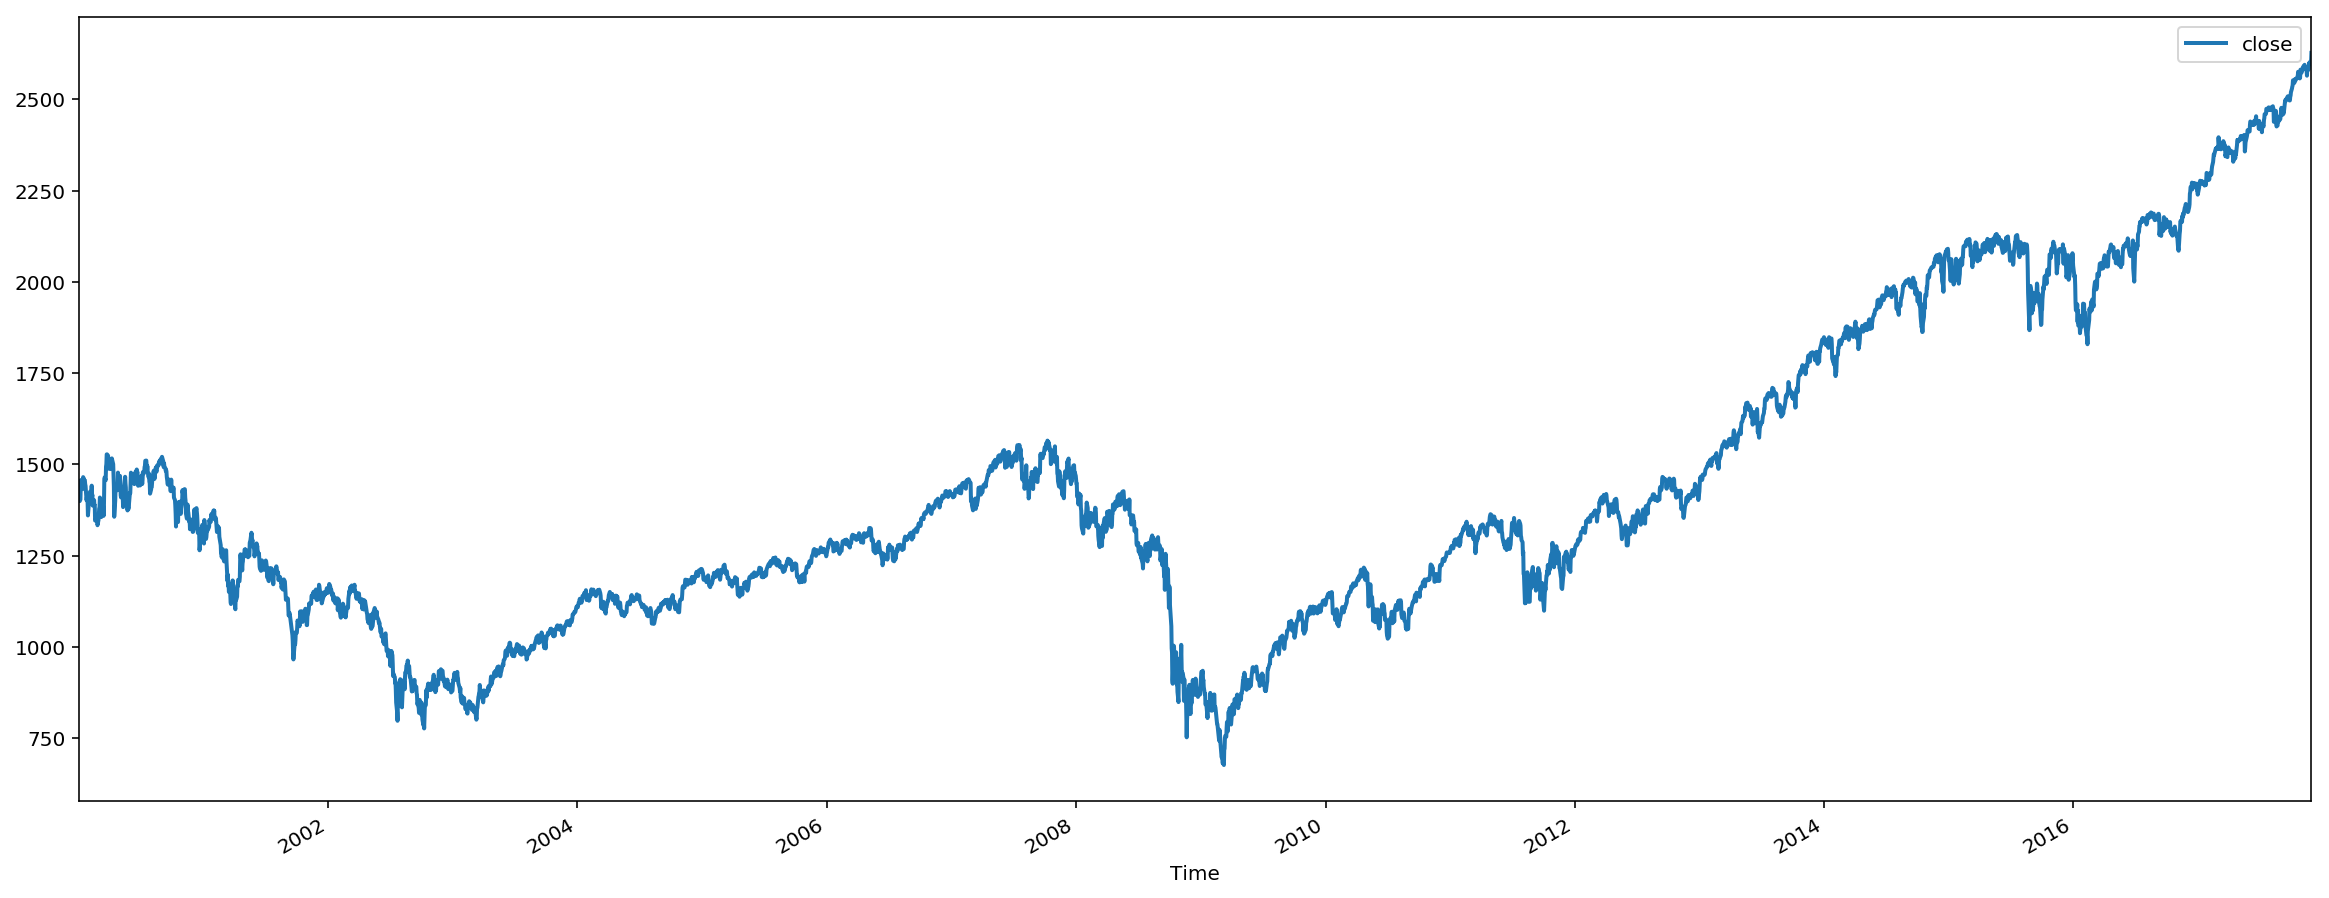

In [5]:
fig, ax = plt.subplots(figsize=(20,8))
df.plot(y='close', ax=ax, lw=2)
plt.xlabel('Time')
plt.show()

# Make a Simple Model

* Will focus on close prices

In [8]:
df = df.drop([x for x in df.columns if x != 'close'], axis=1)
print(df.shape)
df.head()

(4506, 1)


,close
2000-01-03,1455.22
2000-01-04,1399.42
2000-01-05,1402.11
2000-01-06,1403.45
2000-01-07,1441.47


#### Seasonal Decomposition

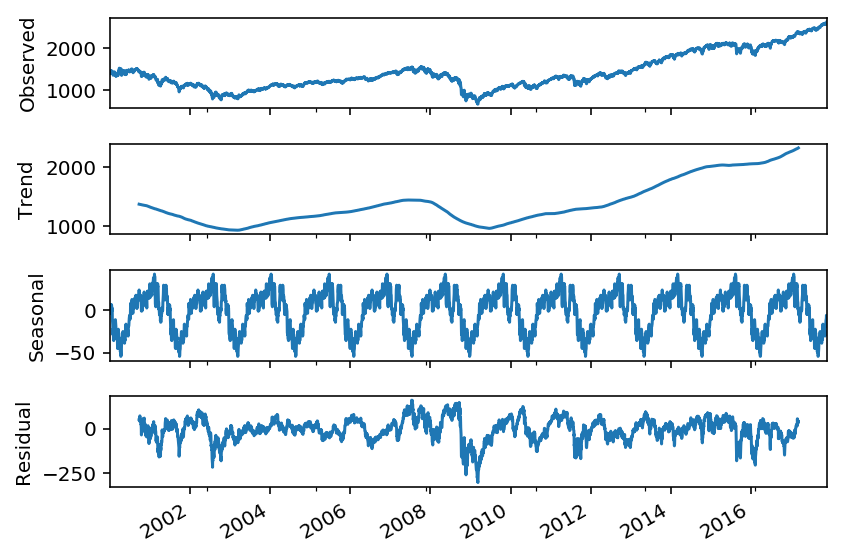

In [12]:
result = seasonal_decompose(df, freq=365)
result.plot();

#### Autocorrelations

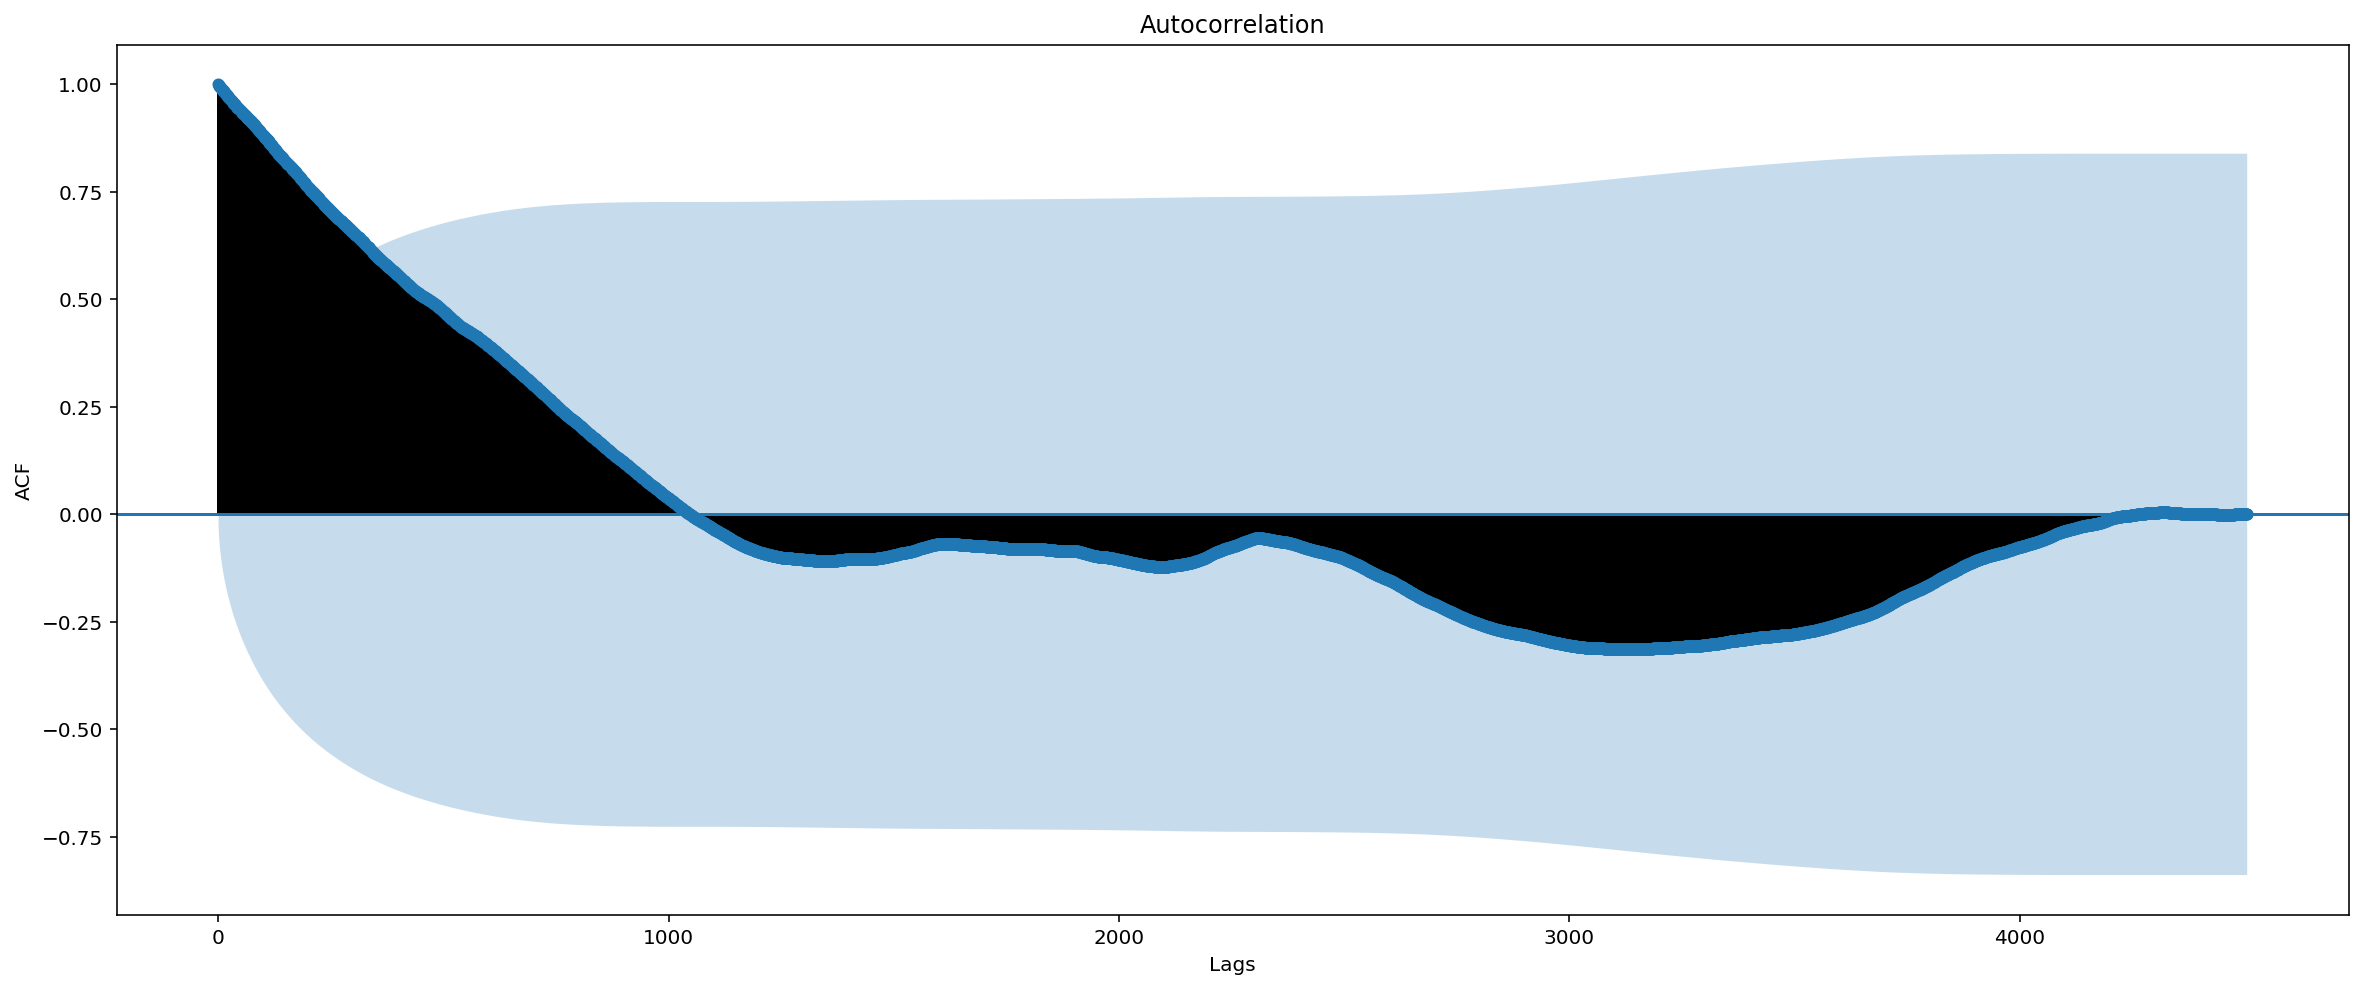

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(df.close, ax=ax);
plt.xlabel('Lags')
plt.ylabel('ACF')

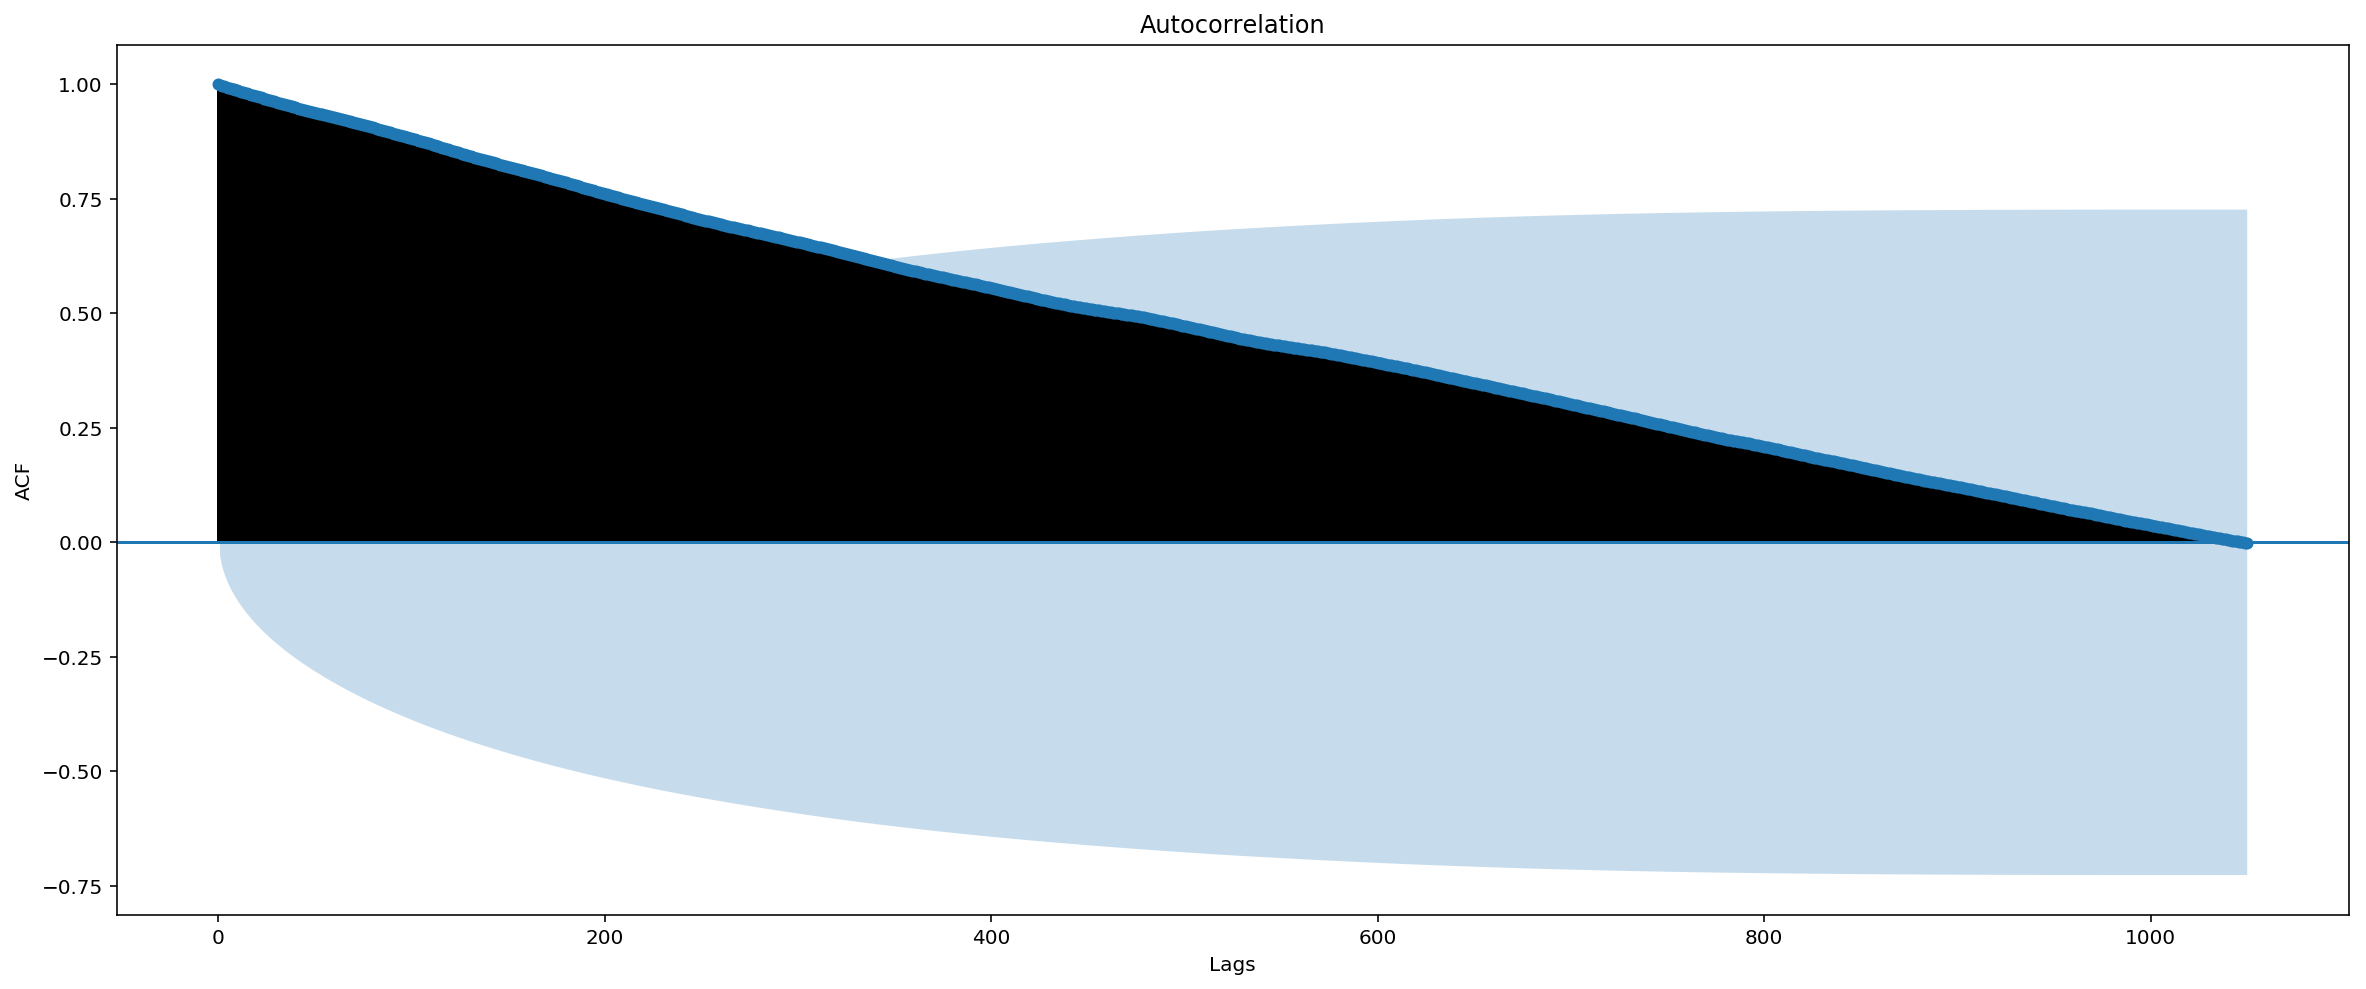

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(df.close, lags=1050, ax=ax);
plt.xlabel('Lags')
plt.ylabel('ACF')

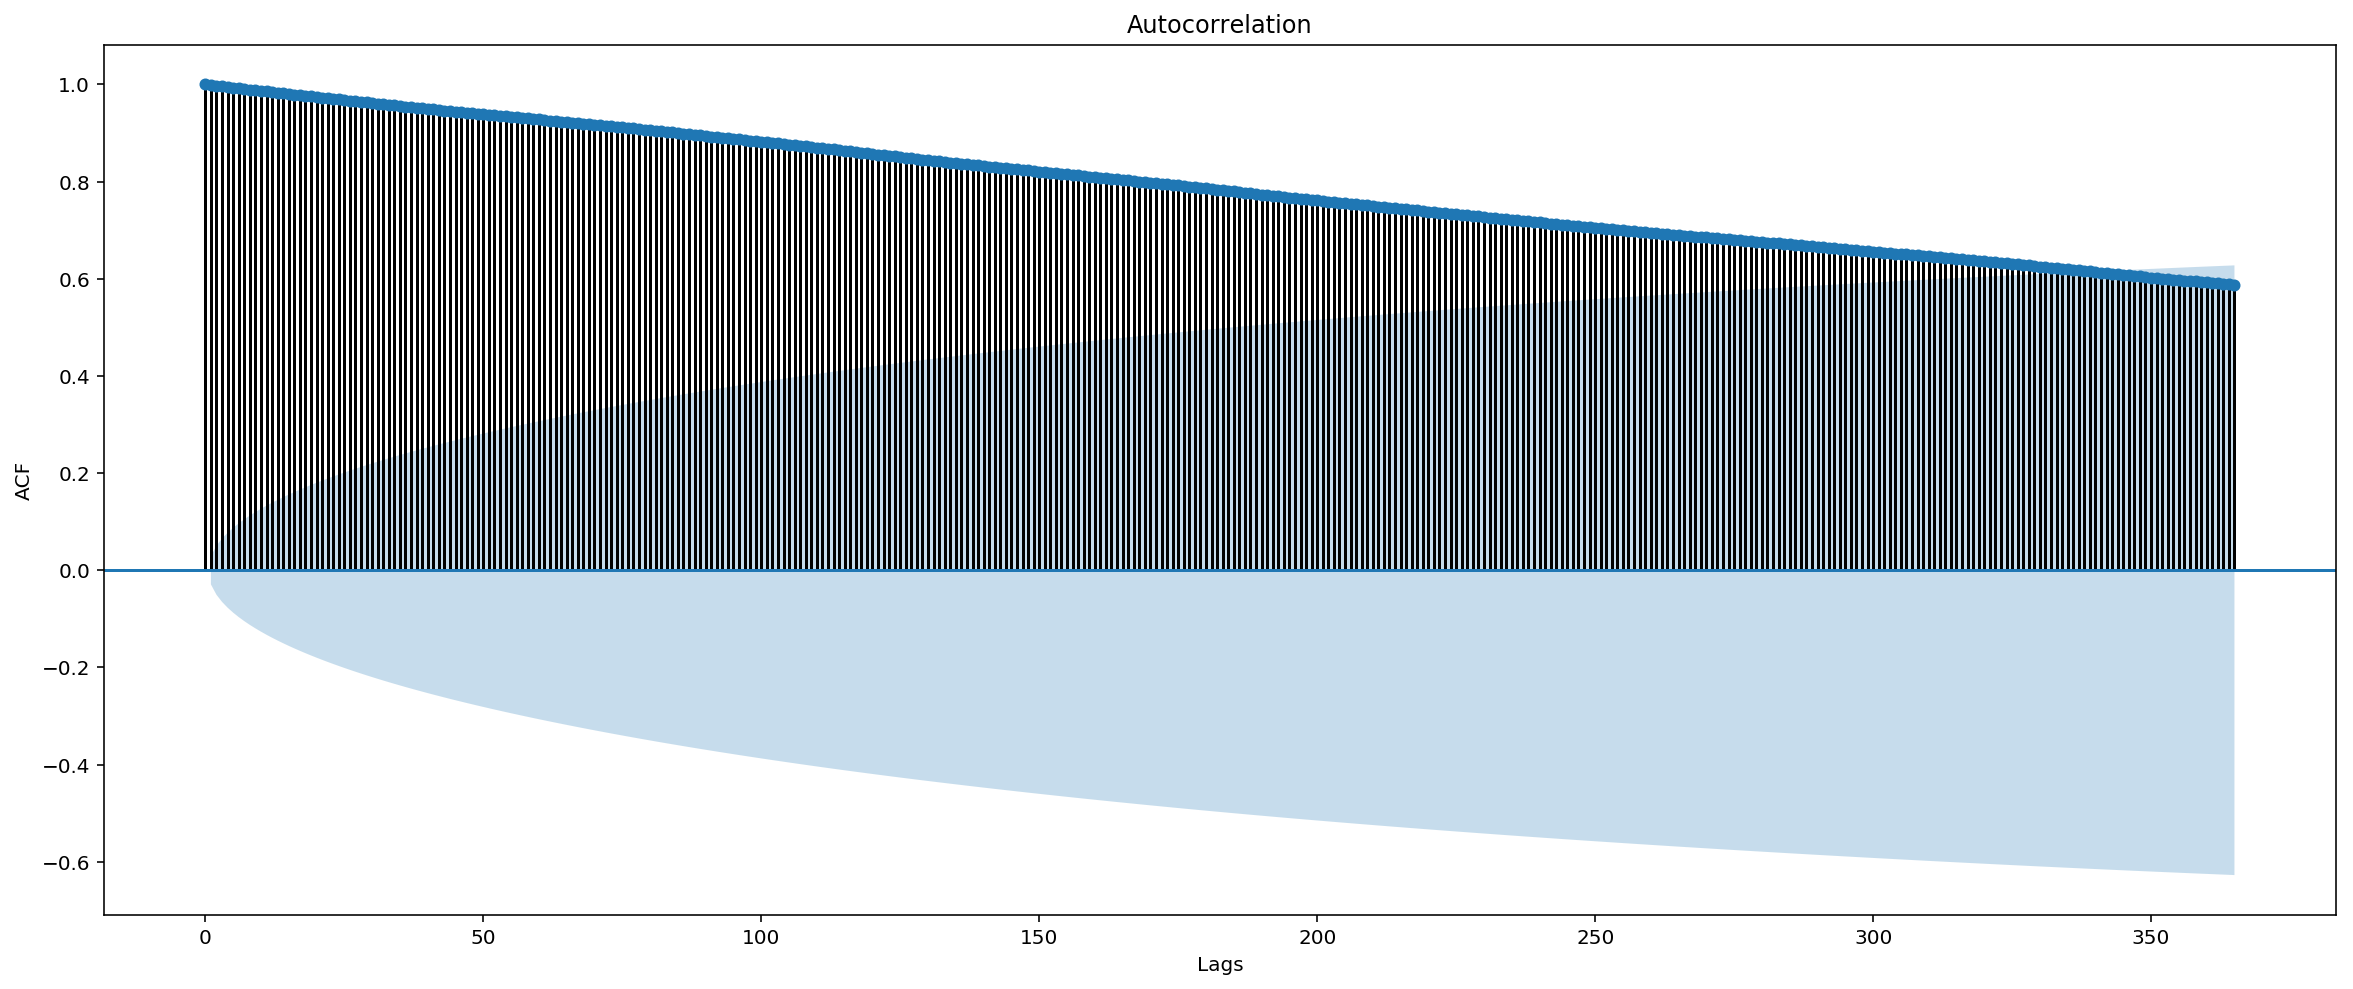

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(df.close, lags=365, ax=ax);
plt.xlabel('Lags')
plt.ylabel('ACF')

#### Partial Autocorrelations

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plot_pacf(df.close, ax=ax);
plt.xlabel('Lags')
plt.ylabel('PACF')

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plot_pacf(df.close, lags=1050, ax=ax);
plt.xlabel('Lags')
plt.ylabel('PACF')

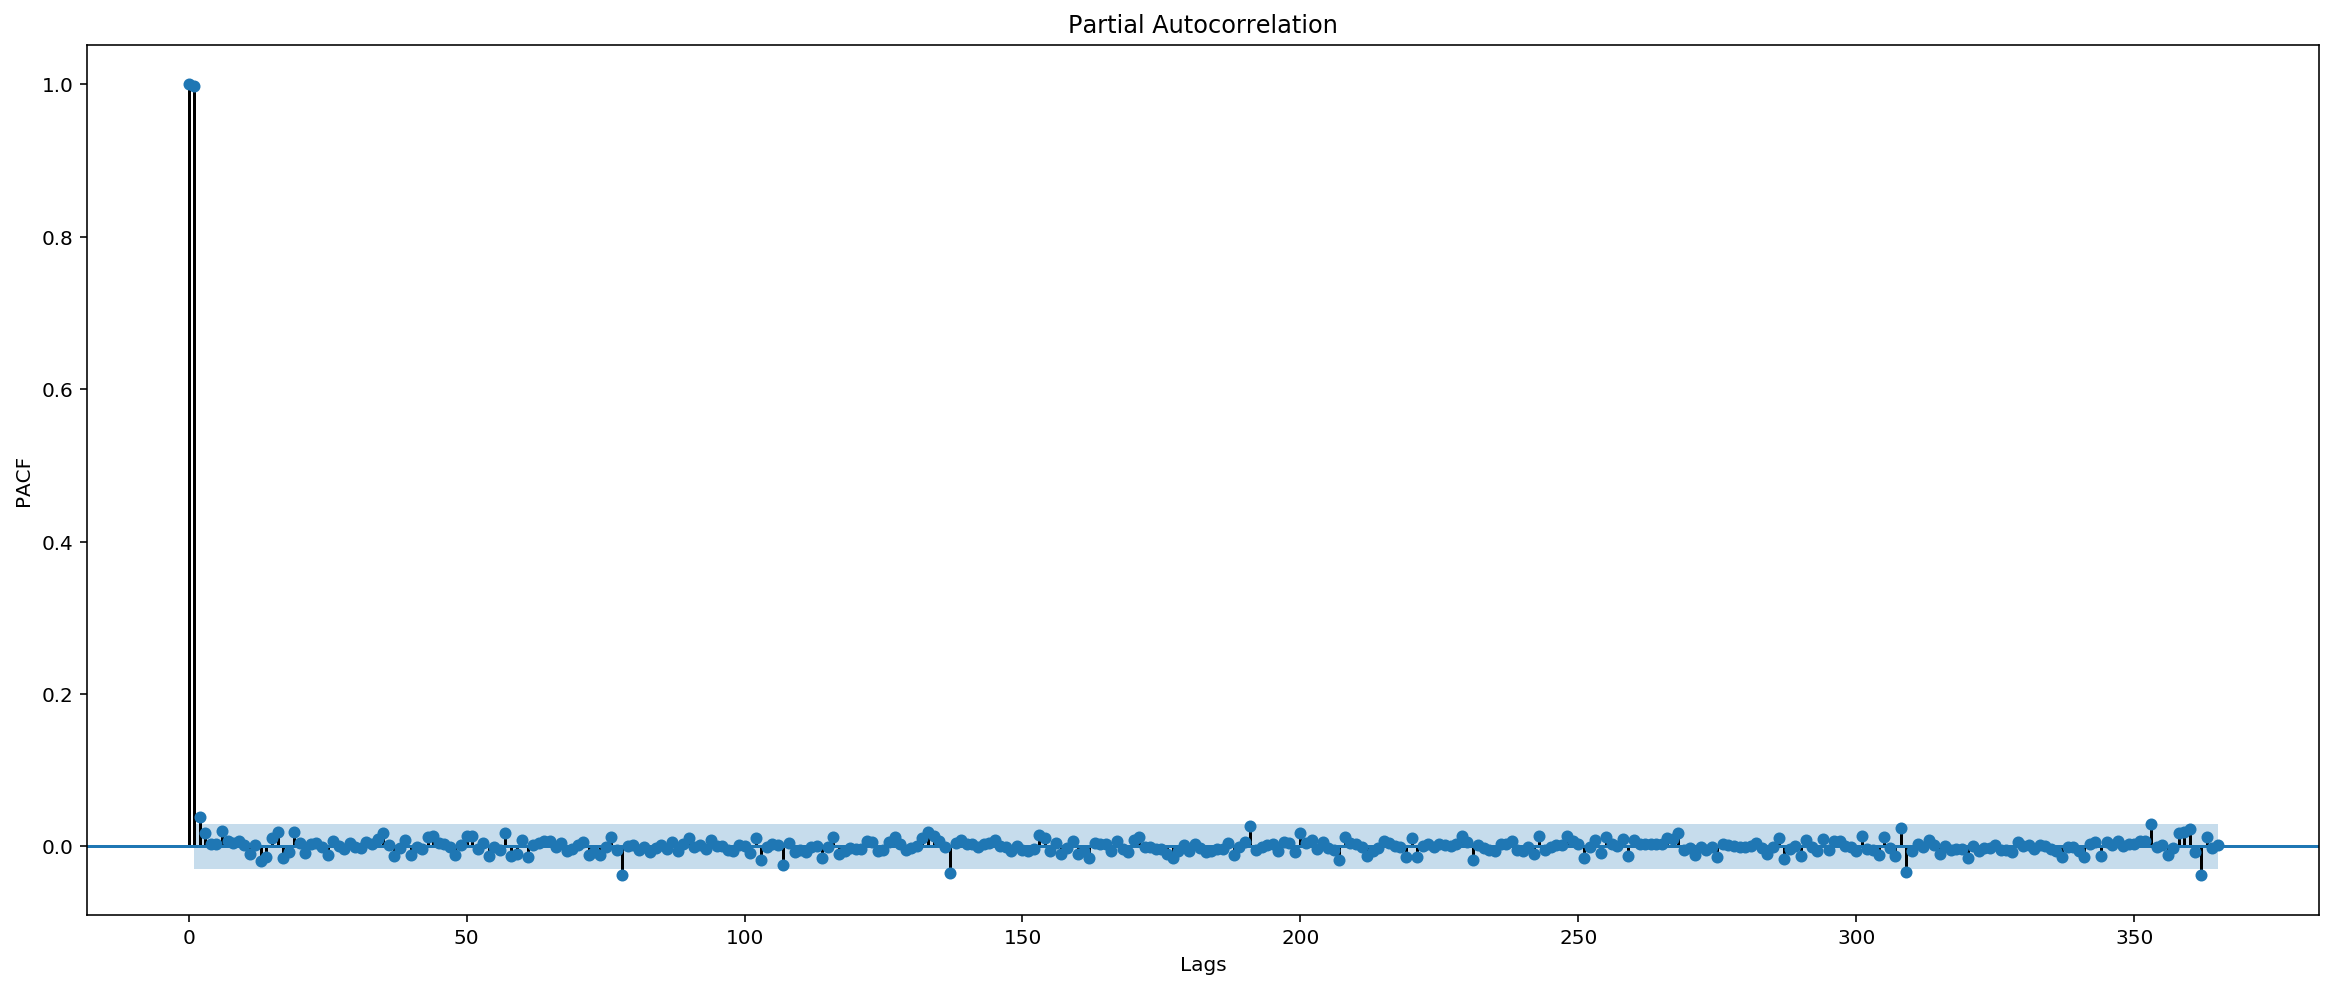

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
plot_pacf(df.close, lags=365, ax=ax);
plt.xlabel('Lags')
plt.ylabel('PACF')

### Look at the Differences in close

In [31]:
df['close_diff'] = df.close.diff()
df.head()

,close,close_diff
2000-01-03,1455.22,NaN
2000-01-04,1399.42,-55.80
2000-01-05,1402.11,2.69
2000-01-06,1403.45,1.34
2000-01-07,1441.47,38.02


In [38]:
diff = df.drop('close', axis=1)
diff.dropna(inplace=True)
print(diff.shape)
diff.head()

(4505, 1)


,close_diff
2000-01-04,-55.80
2000-01-05,2.69
2000-01-06,1.34
2000-01-07,38.02
2000-01-10,16.13


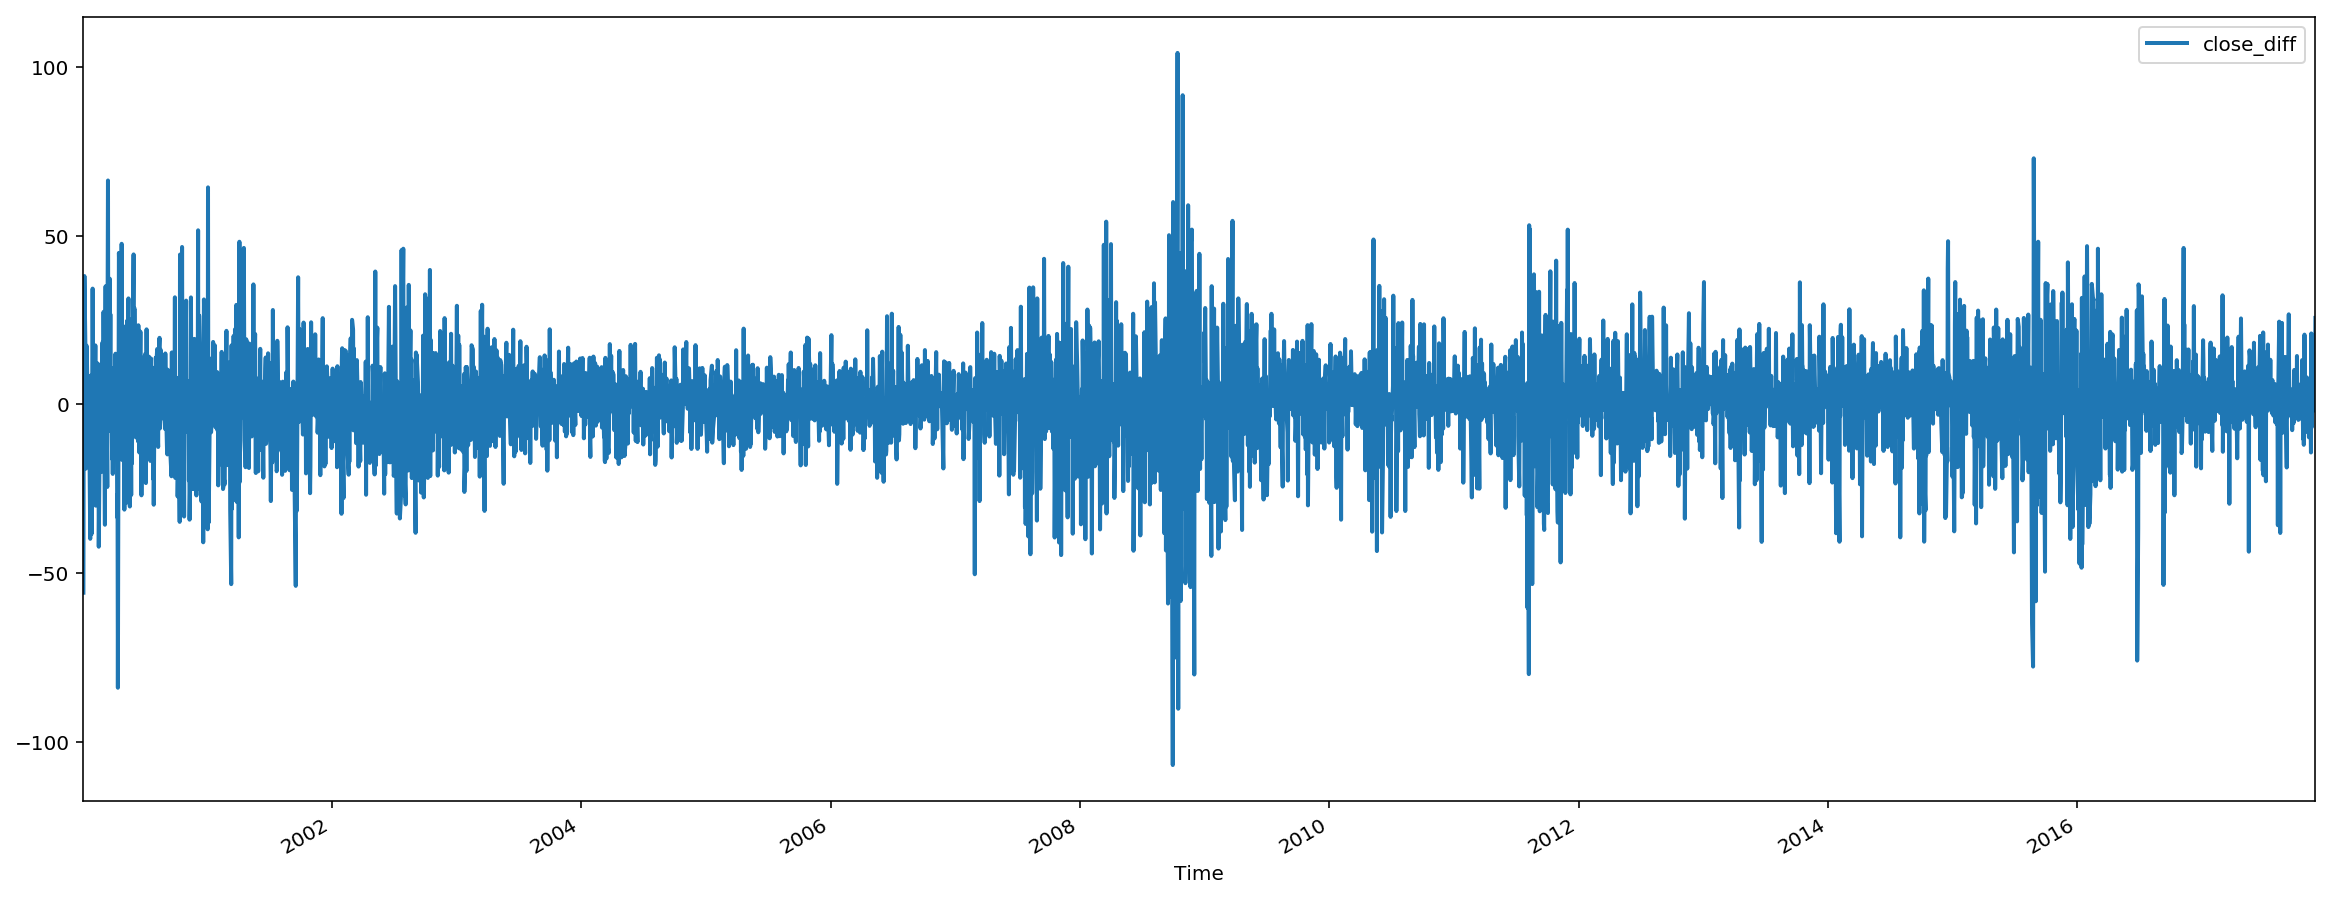

In [39]:
fig, ax = plt.subplots(figsize=(20,8))
diff.plot(y='close_diff', ax=ax, lw=2)
plt.xlabel('Time')
plt.show()

#### Correlation

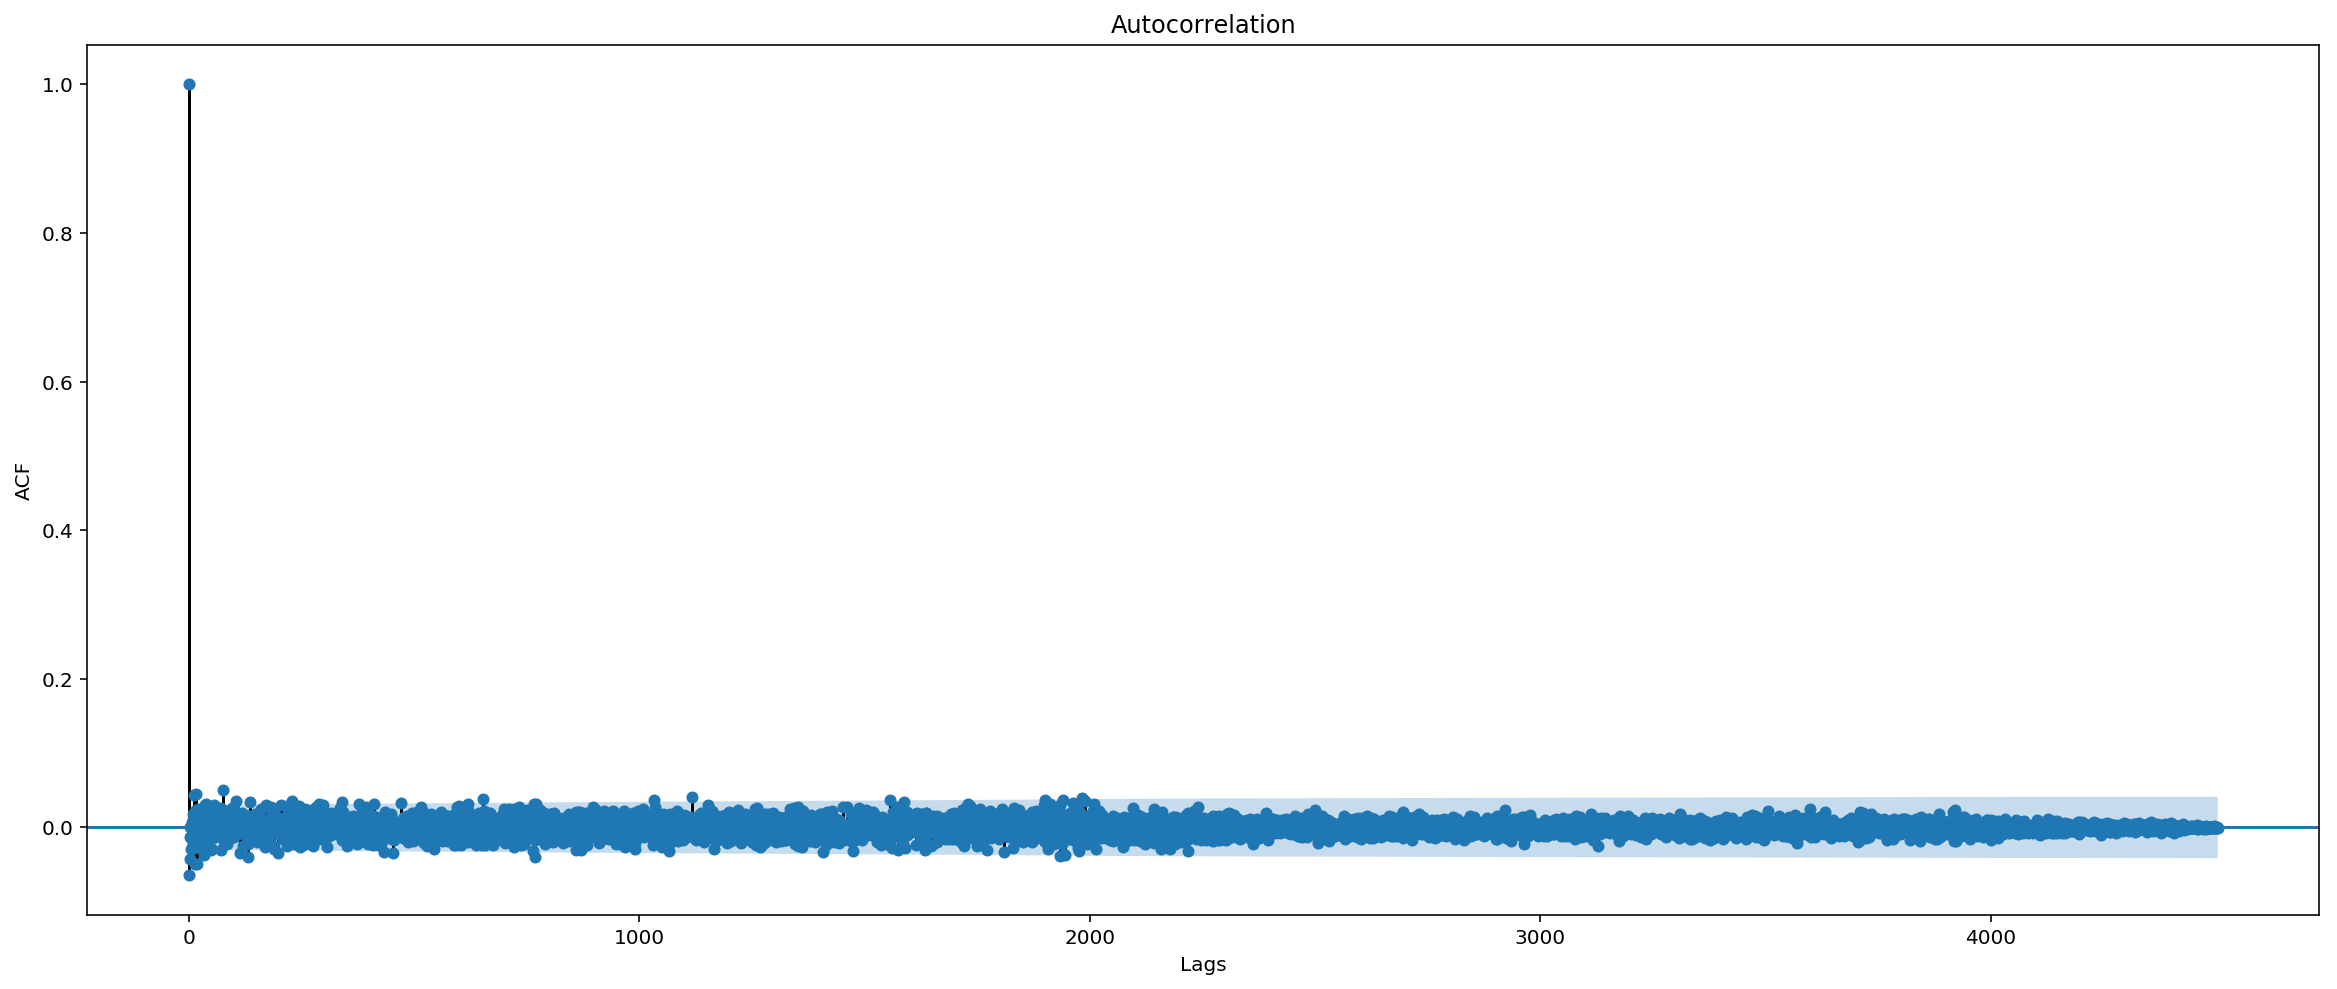

In [40]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(diff.close_diff, ax=ax);
plt.xlabel('Lags')
plt.ylabel('ACF')

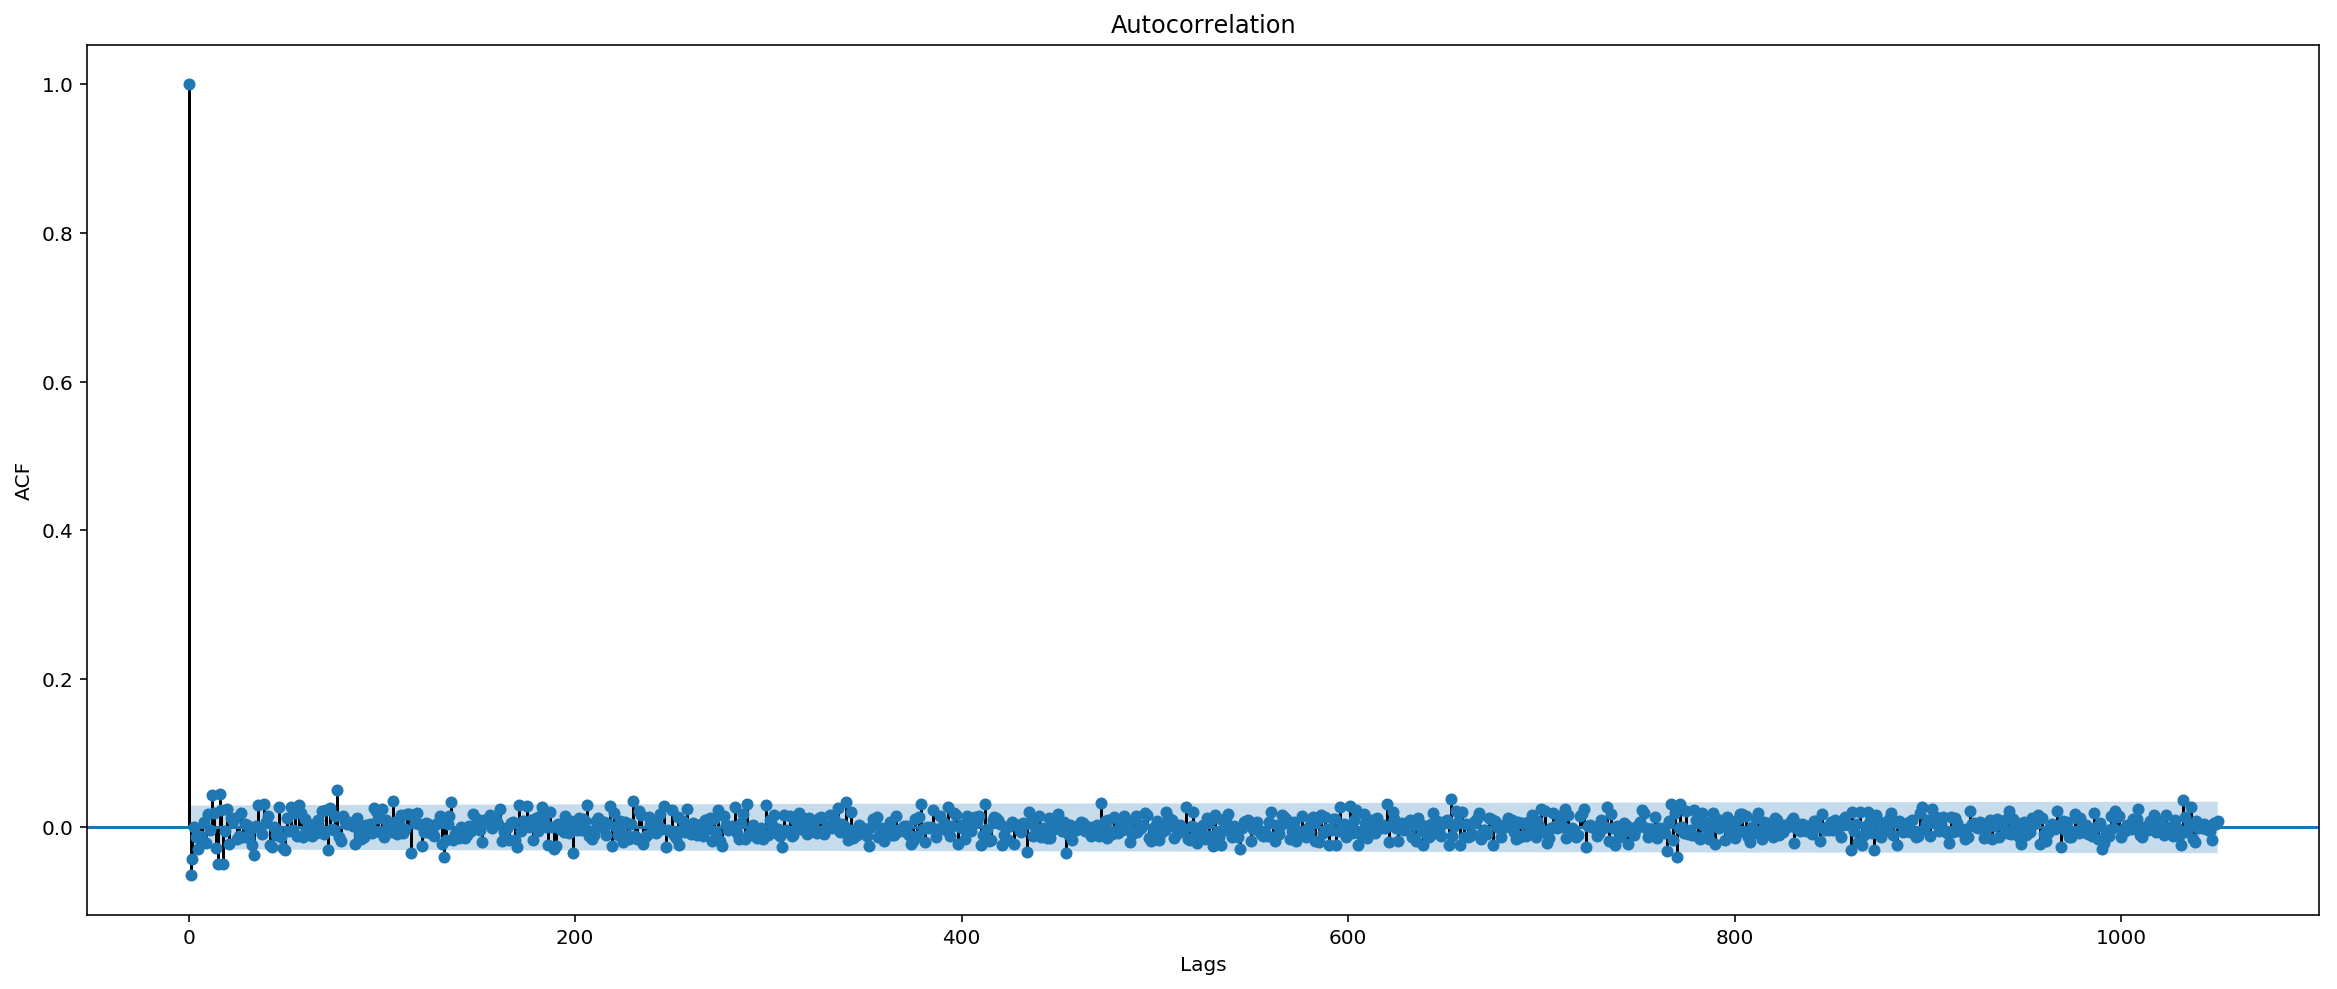

In [41]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(diff.close_diff, lags=1050, ax=ax);
plt.xlabel('Lags')
plt.ylabel('ACF')

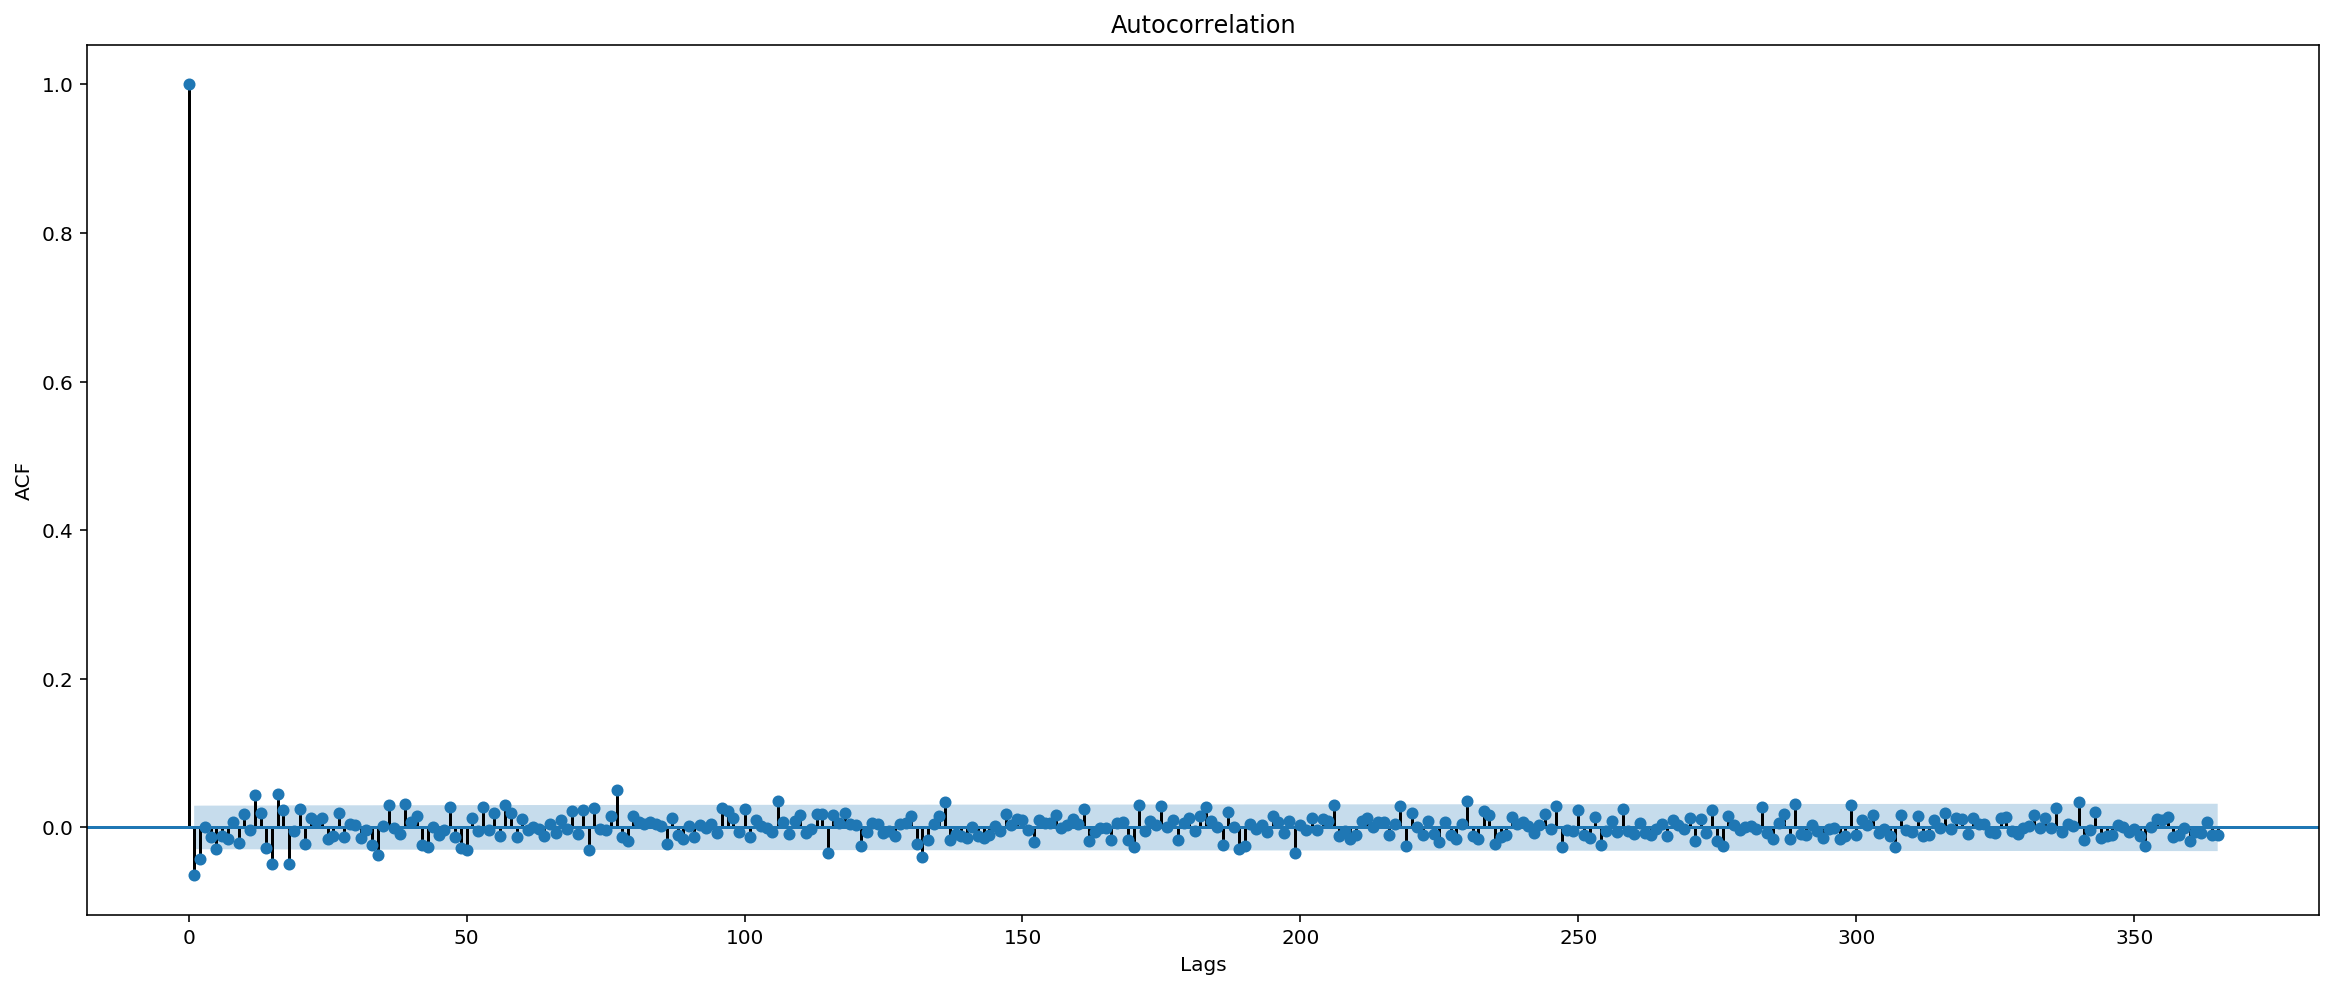

In [42]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(diff.close_diff, lags=365, ax=ax);
plt.xlabel('Lags')
plt.ylabel('ACF')

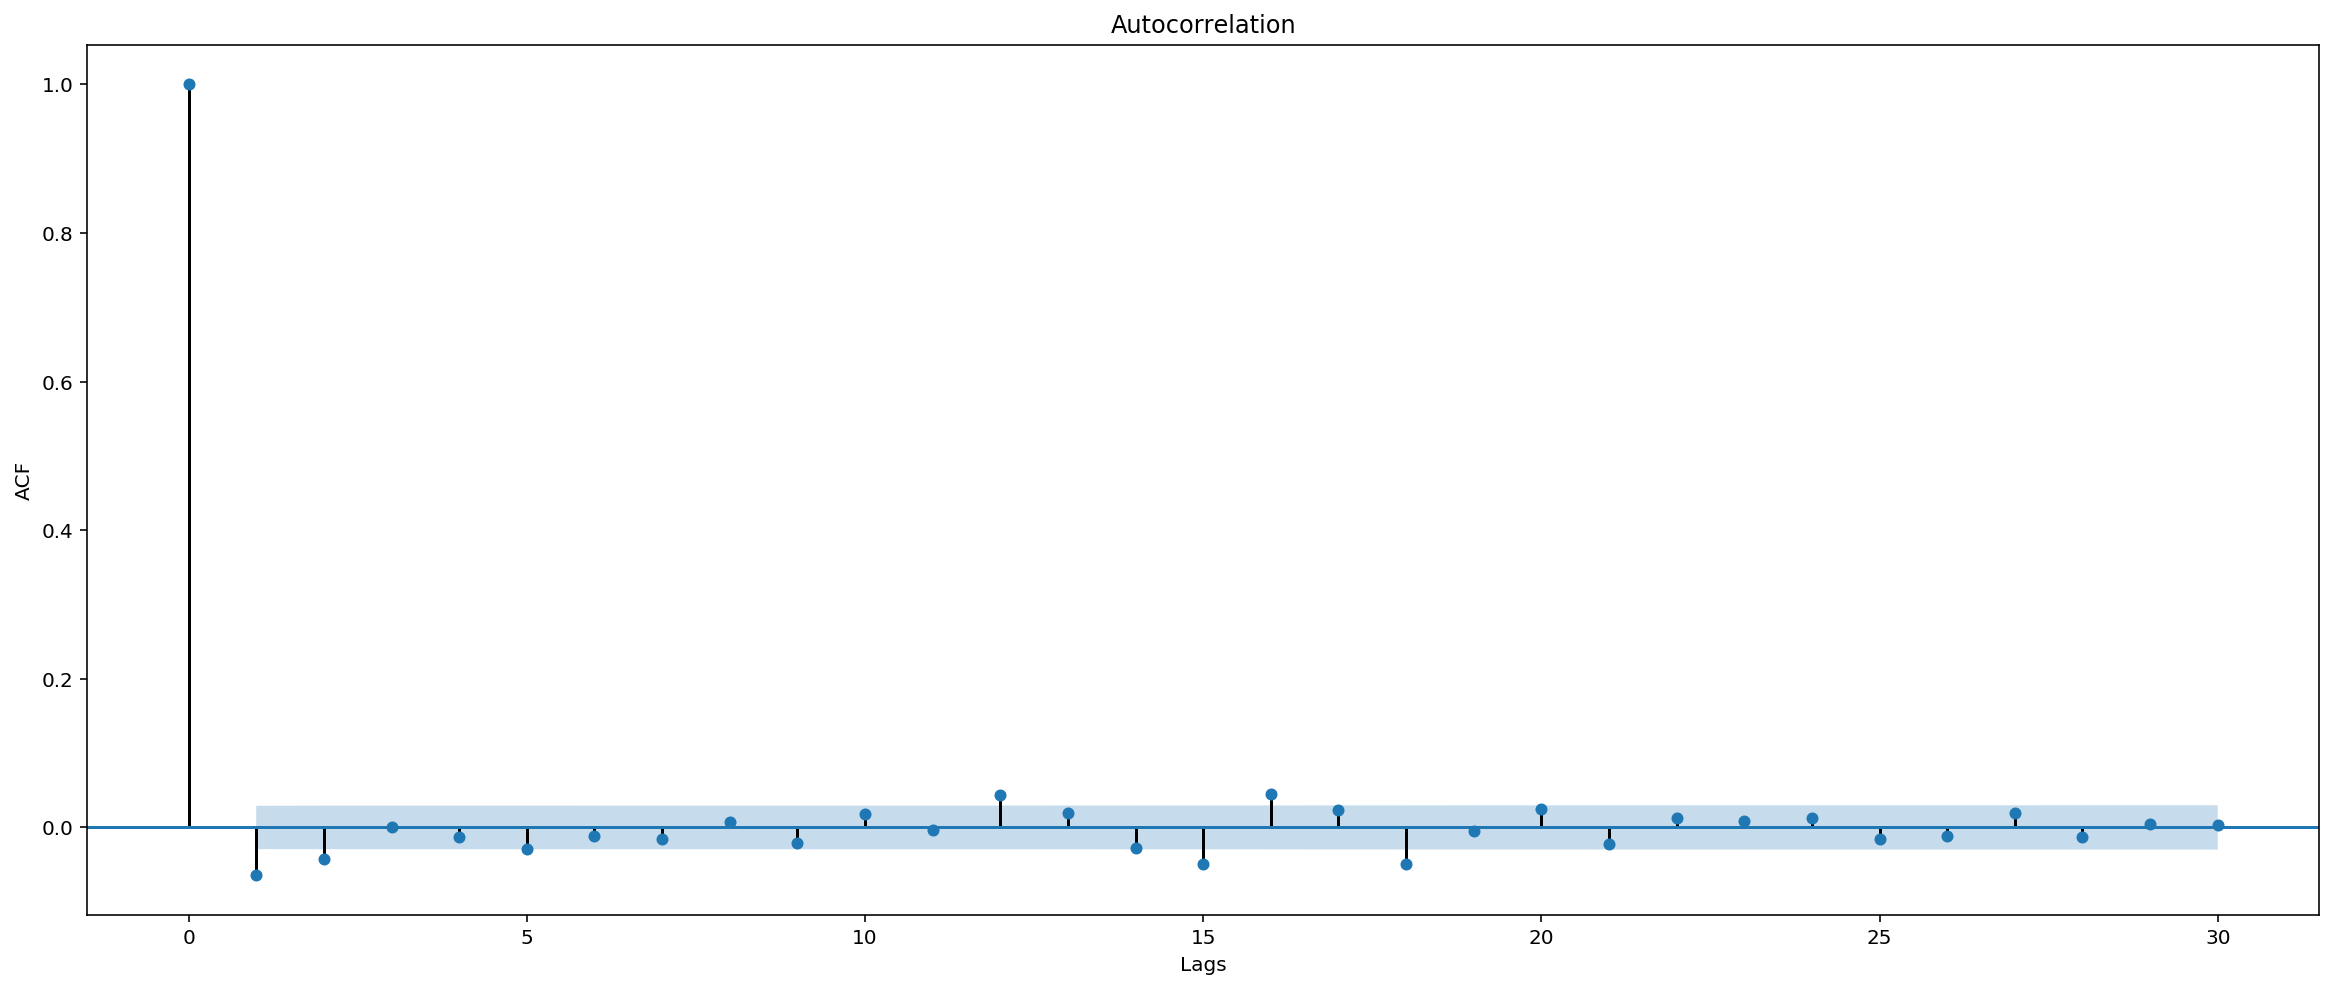

In [43]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(diff.close_diff, lags=30, ax=ax);
plt.xlabel('Lags')
plt.ylabel('ACF')

#### Model

In [48]:
ar1 = ARMA(diff.values, (1,0)).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 4505
Model:                     ARMA(1, 0)   Log Likelihood              -18569.441
Method:                       css-mle   S.D. of innovations             14.925
Date:                Tue, 28 Nov 2017   AIC                          37144.882
Time:                        17:54:20   BIC                          37164.121
Sample:                             0   HQIC                         37151.661
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2605      0.209      1.247      0.212      -0.149       0.670
ar.L1.y       -0.0643      0.015     -4.319      0.000      -0.094      -0.035
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -15.5443           +0.0000j           15.5443            0.5000
-----------------------------------------------------------------------------
"""

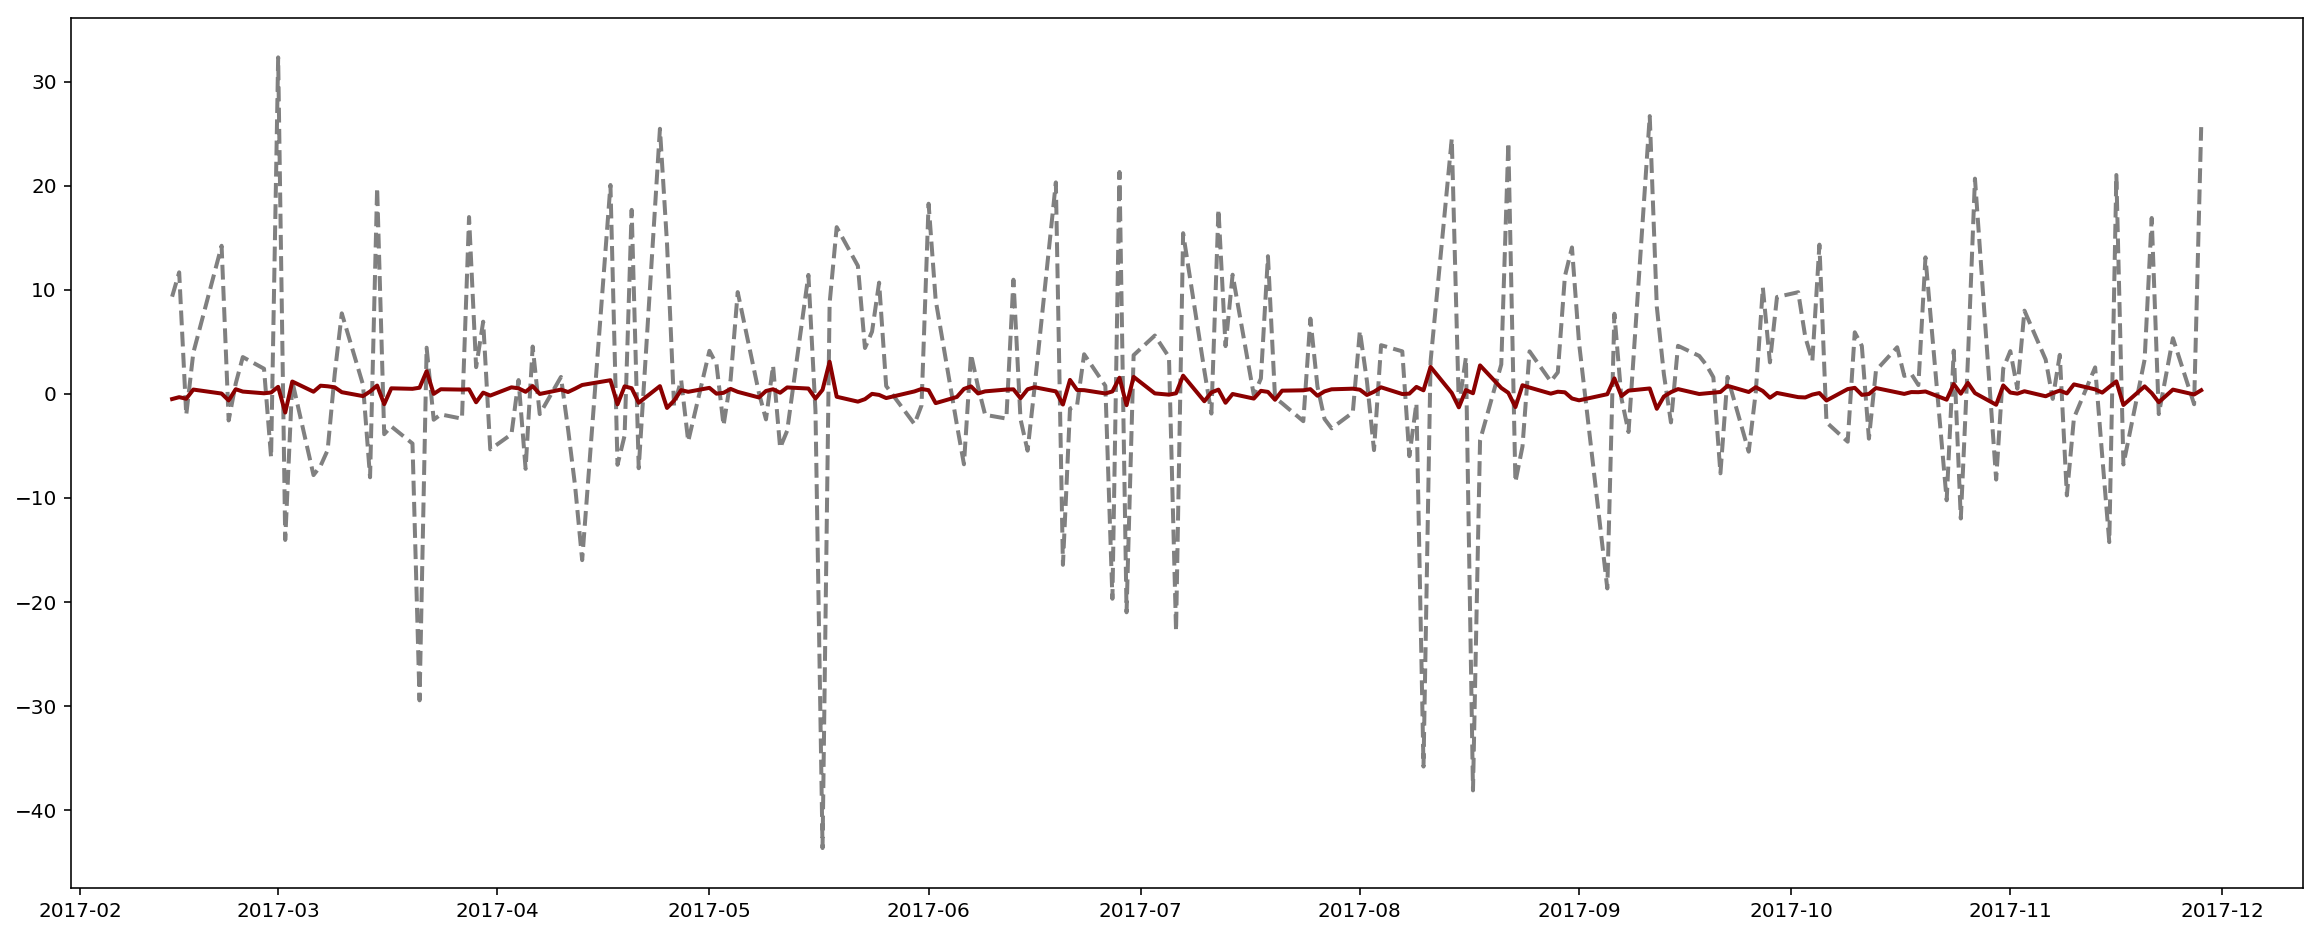

In [59]:
date_ticks = diff.index

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(date_ticks[-200:], diff[-200:], lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[-200:], ar1.fittedvalues[-200:], lw=2, color='darkred')
plt.show()

In [75]:
ma1 = ARMA(diff.values, (2,0)).fit()
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 4505
Model:                     ARMA(2, 0)   Log Likelihood              -18564.510
Method:                       css-mle   S.D. of innovations             14.908
Date:                Tue, 28 Nov 2017   AIC                          37137.019
Time:                        21:39:57   BIC                          37162.671
Sample:                             0   HQIC                         37146.057
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2608      0.199      1.308      0.191      -0.130       0.652
ar.L1.y       -0.0673      0.015     -4.517      0.000      -0.097      -0.038
ar.L2.y       -0.0468      0.015     -3.142      0.002      -0.076      -0.018
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7188           -4.5642j            4.6204           -0.2749
AR.2           -0.7188           +4.5642j            4.6204            0.2749
-----------------------------------------------------------------------------
"""

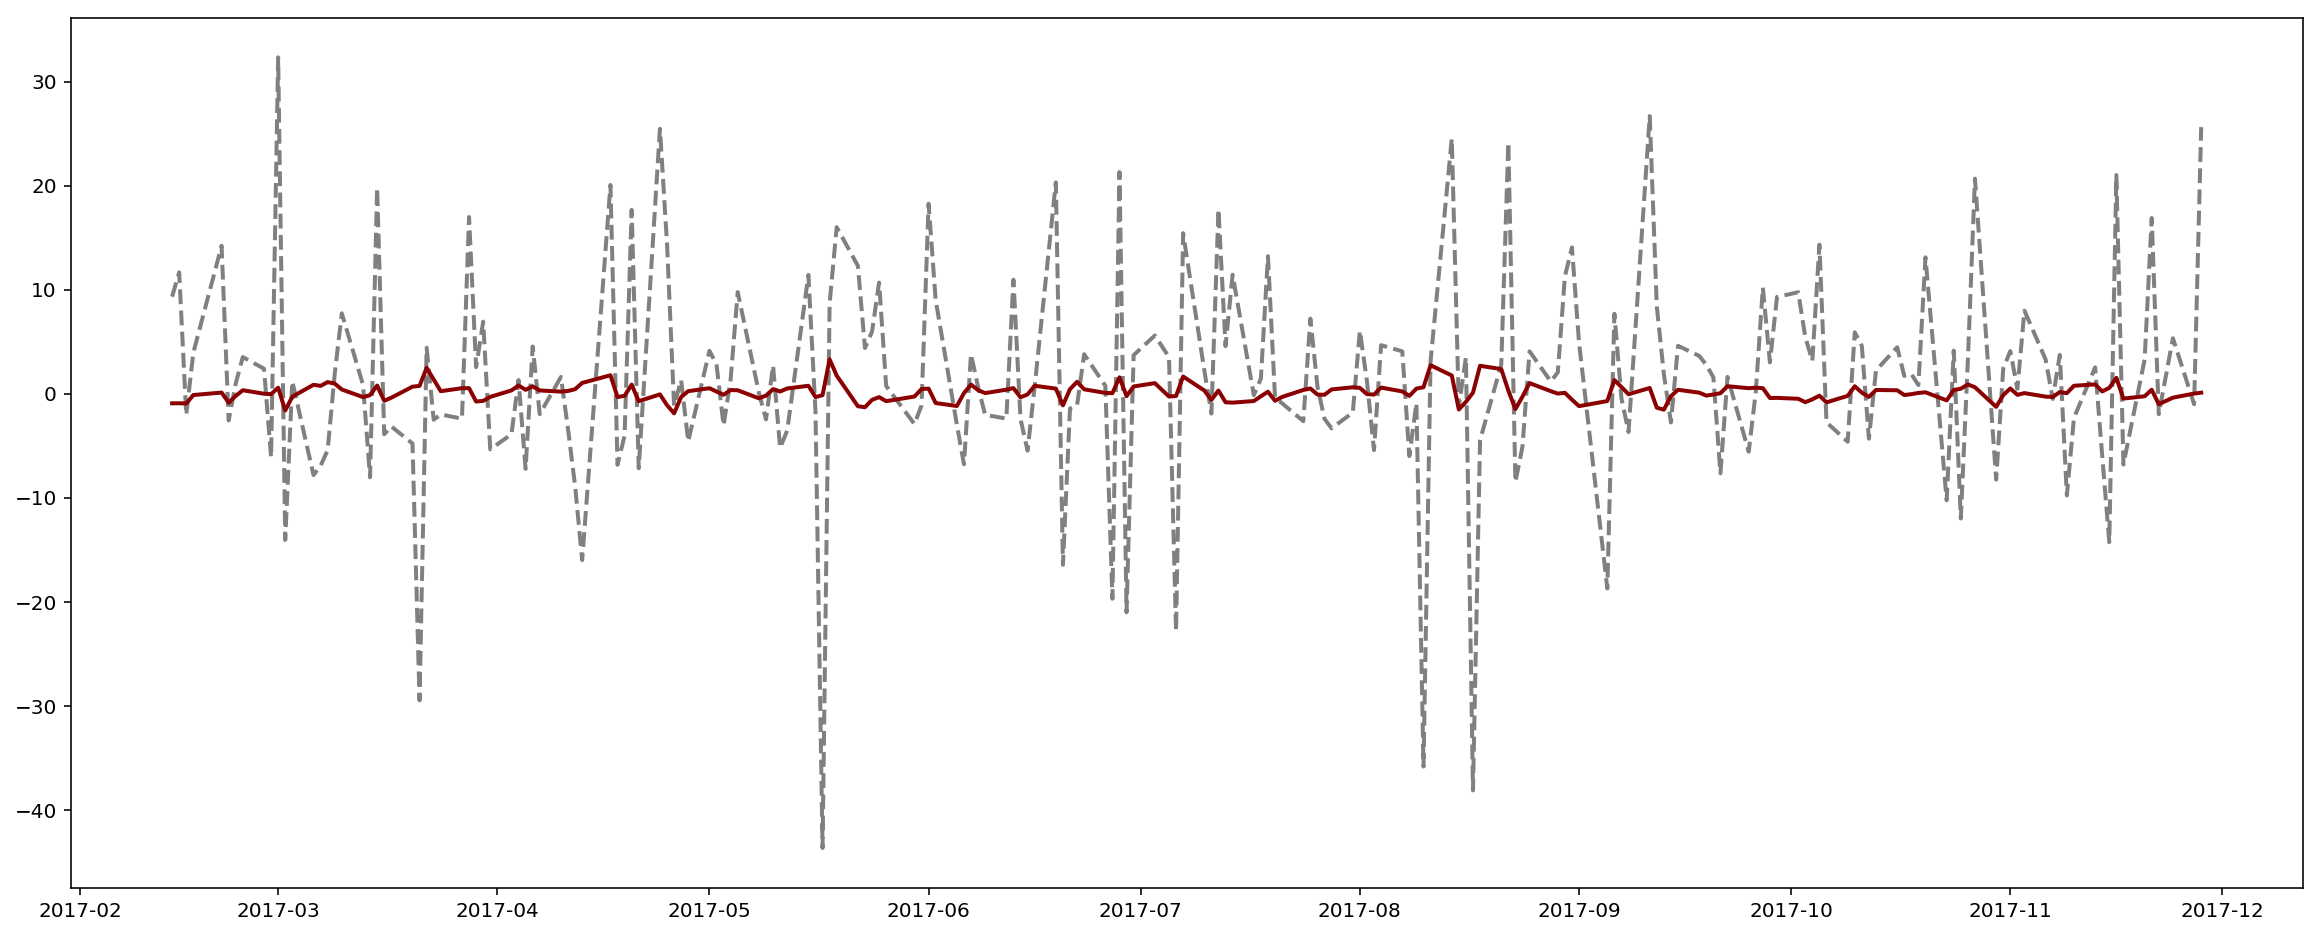

In [76]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(date_ticks[-200:], diff[-200:], lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[-200:], ma1.fittedvalues[-200:], lw=2, color='darkred')
plt.show()

In [ ]:
ar1ma1 = ARMA(diff.values, (2s,2)).fit()
ar1ma1.summary()

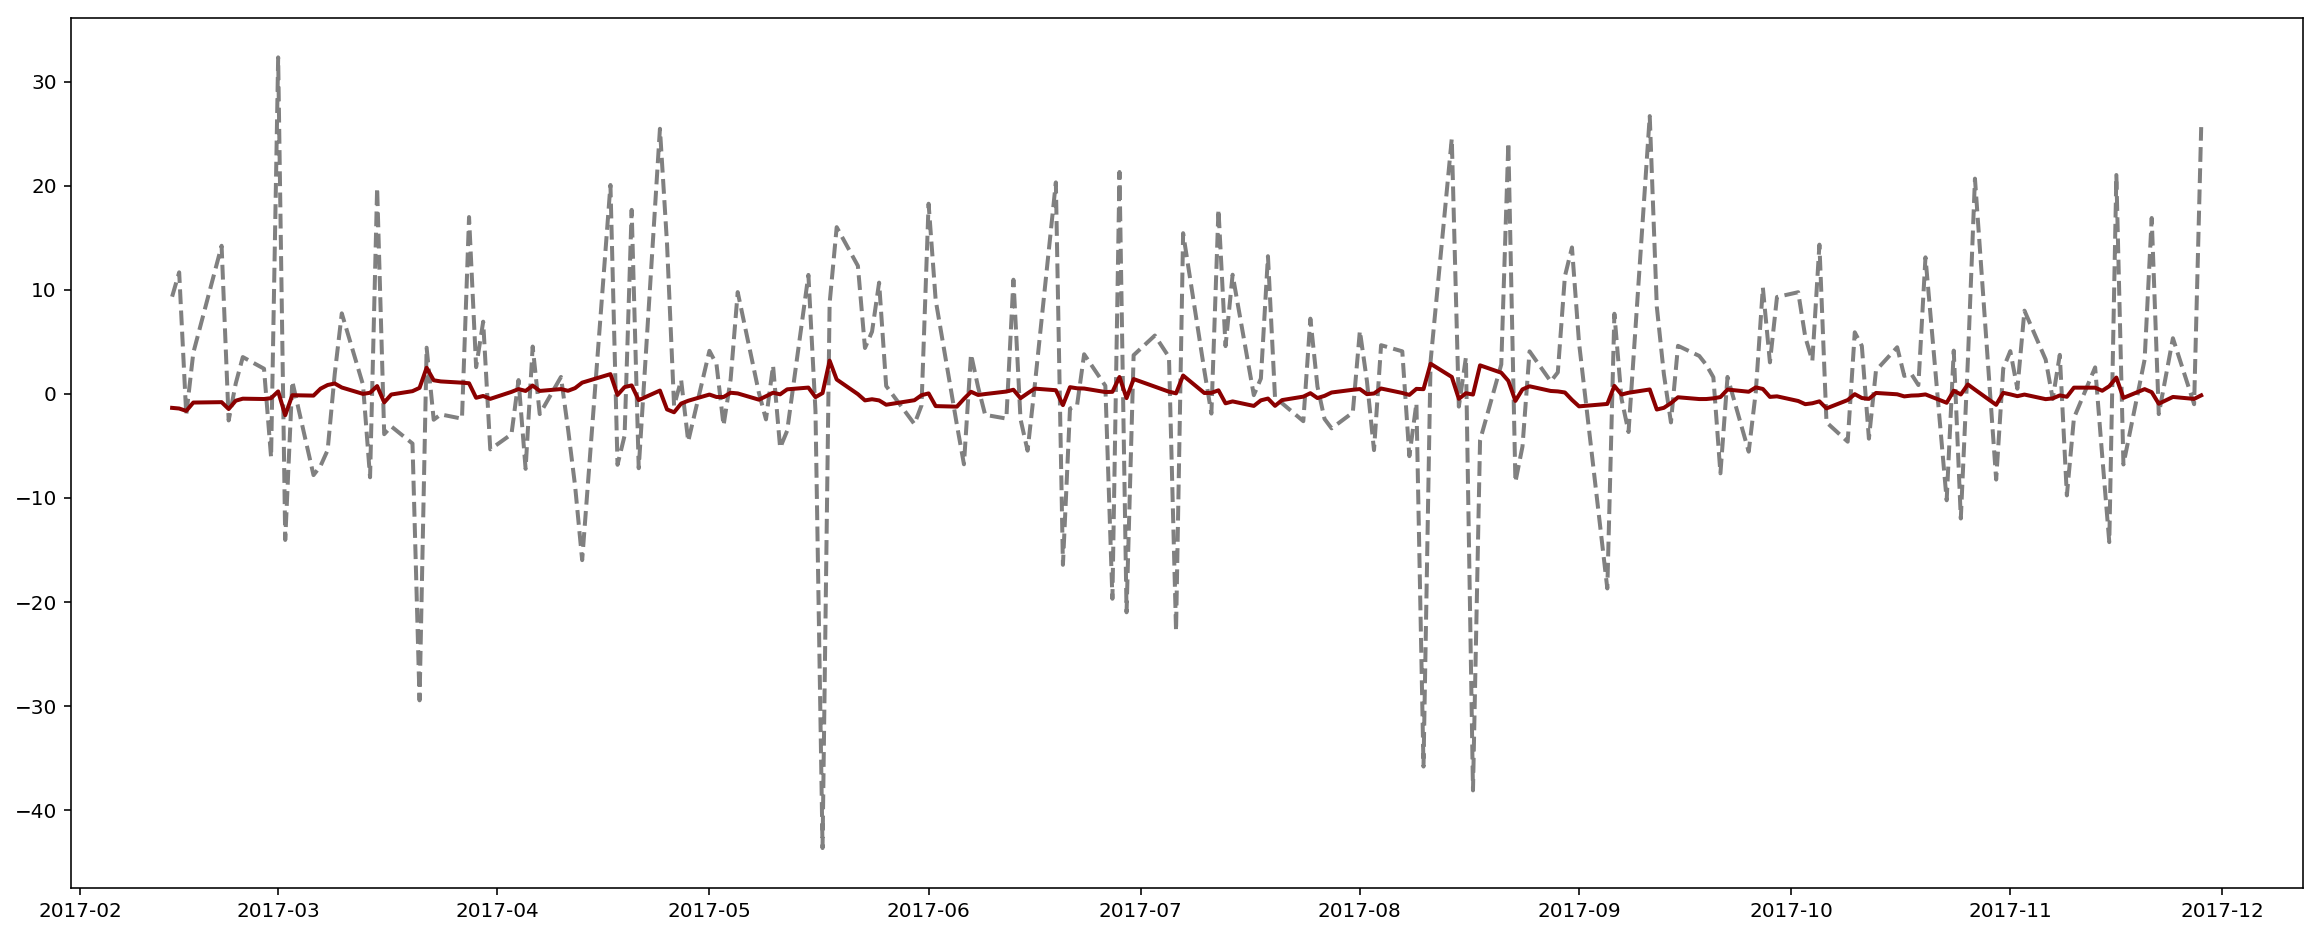

In [70]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(date_ticks[-200:], diff[-200:], lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[-200:], ar1ma1.fittedvalues[-200:], lw=2, color='darkred')
plt.show()

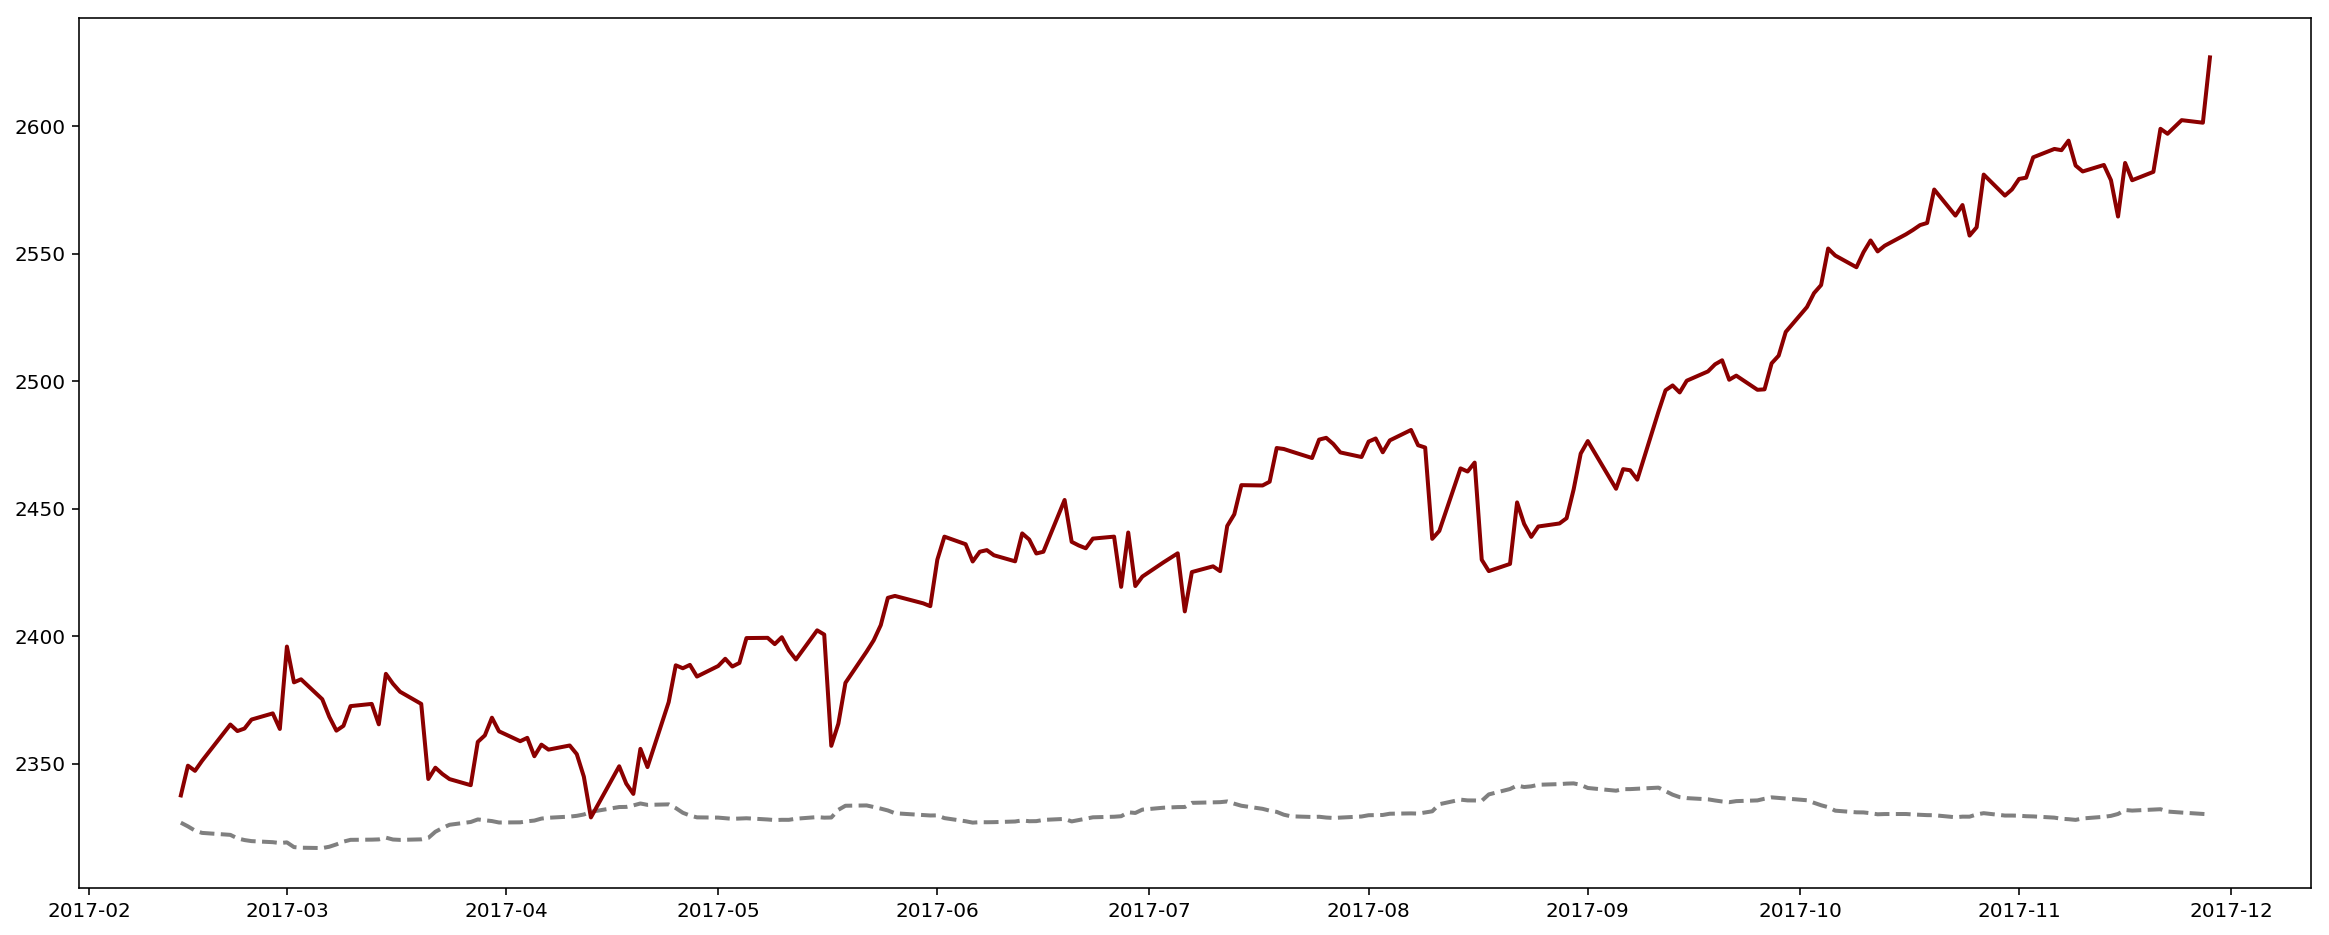

In [66]:
full_pred = df.close.values[0]+np.cumsum(ar1ma1.fittedvalues)

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(date_ticks[1:], full_pred, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], df.close[1:], lw=2, color='darkred')
plt.show()